## Final Project Submission

Please fill out:
* Student name: Nduku Kiteng'e
* Student pace: Part time
* Scheduled project review date/time: June 3 2024
* Instructor name: Sam Karu
* Blog post URL:


In [2]:
#add libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Project description:

Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.



# Step 1: Data review:

Review current datasets to understand what they have.

In [4]:
#import in db
import sqlite3 
conn = sqlite3.connect('im.db')

In [6]:
#set up query
imdb_query = """SELECT * FROM movie_basics;"""

In [11]:
#read imdb file
imdb_df = pd.read_sql(imdb_query,conn)
imdb_df.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [3]:
#review csv files
#bom file
bom_df=pd.read_csv('bom.movie_gross.csv')
bom_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [4]:
#review csv files
#tmdbmovies file
tmdb_df=pd.read_csv('tmdb.movies.csv')
tmdb_df.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [16]:
#review csv files
#tmdbmovie budgets file
tnbudg_df=pd.read_csv('zippedData/tn.movie_budgets.csv')
tnbudg_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [5]:
#review csv files
# rt movies file
rt_df=pd.read_csv('rt.movie_info.tsv', delimiter='\t')
rt_df.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [13]:
#review csv files
# rt movies file
rtr_df=pd.read_csv('zippedData/rt.reviews.tsv', delimiter='\t', encoding='latin-1')
rtr_df.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


# Step 2: Identify business cases:
The second step would be to identify which data points would be most useful to the Microsoft team. I would like to review the key elements that would make someone want to invest a movie. 

# a. Profitability. 
This section will look at the most profitable types of movies. 

In [6]:
#read file
tnbudg_df=pd.read_csv('tn.movie_budgets.csv')

# Convert columns to numeric
tnbudg_df['worldwide_gross'] = tnbudg_df['worldwide_gross'].str.replace('[\$,]', '', regex=True).astype(float)
tnbudg_df['production_budget'] = tnbudg_df['production_budget'].str.replace('[\$,]', '', regex=True).astype(float)


#calculate gross profit per movie on the budgets table
worldwide_gross = tnbudg_df['worldwide_gross']
production_budget = tnbudg_df['production_budget']
world_profit = worldwide_gross - production_budget

# Add the calculated profit column to the DataFrame
tnbudg_df['World_profit'] = world_profit


print(tnbudg_df.head())

   id  release_date                                        movie  \
0   1  Dec 18, 2009                                       Avatar   
1   2  May 20, 2011  Pirates of the Caribbean: On Stranger Tides   
2   3   Jun 7, 2019                                 Dark Phoenix   
3   4   May 1, 2015                      Avengers: Age of Ultron   
4   5  Dec 15, 2017            Star Wars Ep. VIII: The Last Jedi   

   production_budget domestic_gross  worldwide_gross  World_profit  
0        425000000.0   $760,507,625     2.776345e+09  2.351345e+09  
1        410600000.0   $241,063,875     1.045664e+09  6.350639e+08  
2        350000000.0    $42,762,350     1.497624e+08 -2.002376e+08  
3        330600000.0   $459,005,868     1.403014e+09  1.072414e+09  
4        317000000.0   $620,181,382     1.316722e+09  9.997217e+08  


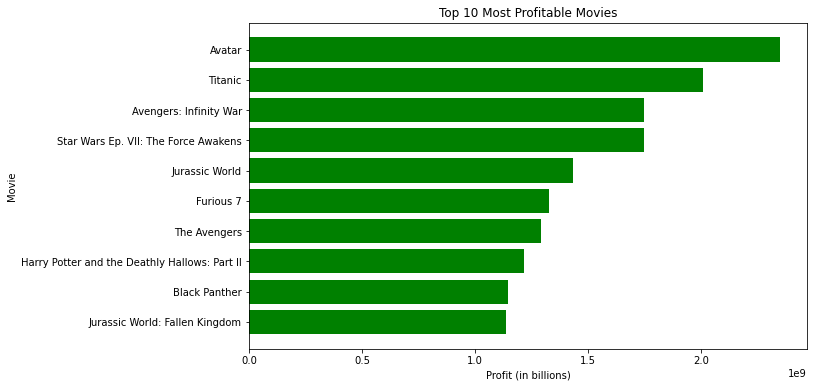

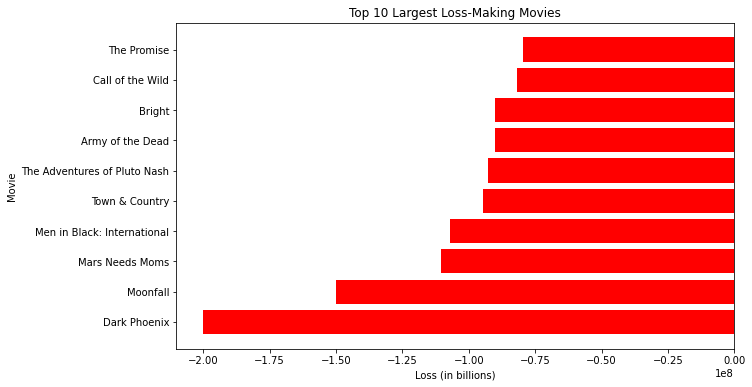

In [27]:

#sort data by most profitable and most loss making
sorted_df = tnbudg_df.sort_values(by='World_profit', ascending=False)

# Plotting top 10 profitable movies
top10_profit = sorted_df.head(10)
plt.figure(figsize=(10, 6))
plt.barh(top10_profitable['movie'], top10_profit['World_profit'], color='green')
plt.xlabel('Profit (in billions)')
plt.ylabel('Movie')
plt.title('Top 10 Most Profitable Movies')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest profit at the top
plt.show()

# Plotting top 10 loss-making movies
top10_loss = sorted_df.tail(10)
plt.figure(figsize=(10, 6))
plt.barh(top10_loss_making['movie'], top10_loss['World_profit'], color='red')
plt.xlabel('Loss (in billions)')
plt.ylabel('Movie')
plt.title('Top 10 Largest Loss-Making Movies')
plt.gca().invert_yaxis()  # Invert y-axis to have the largest loss at the top
plt.show()

The studio with the most domestic profit.

In [7]:
#read file
tnbudg_df=pd.read_csv('tn.movie_budgets.csv')

# Convert columns to numeric
tnbudg_df['domestic_gross'] = tnbudg_df['domestic_gross'].str.replace('[\$,]', '', regex=True).astype(float)
tnbudg_df['production_budget'] = tnbudg_df['production_budget'].str.replace('[\$,]', '', regex=True).astype(float)


#calculate gross domestic profit per movie on the budgets table
domestic_gross = tnbudg_df['domestic_gross']
production_budget = tnbudg_df['production_budget']
domestic_profit = domestic_gross - production_budget

# Add the calculated domestic profit column to the DataFrame
tnbudg_df['domestic_profit'] = domestic_profit


print(tnbudg_df.head())

   id  release_date                                        movie  \
0   1  Dec 18, 2009                                       Avatar   
1   2  May 20, 2011  Pirates of the Caribbean: On Stranger Tides   
2   3   Jun 7, 2019                                 Dark Phoenix   
3   4   May 1, 2015                      Avengers: Age of Ultron   
4   5  Dec 15, 2017            Star Wars Ep. VIII: The Last Jedi   

   production_budget  domestic_gross worldwide_gross  domestic_profit  
0        425000000.0     760507625.0  $2,776,345,279      335507625.0  
1        410600000.0     241063875.0  $1,045,663,875     -169536125.0  
2        350000000.0      42762350.0    $149,762,350     -307237650.0  
3        330600000.0     459005868.0  $1,403,013,963      128405868.0  
4        317000000.0     620181382.0  $1,316,721,747      303181382.0  


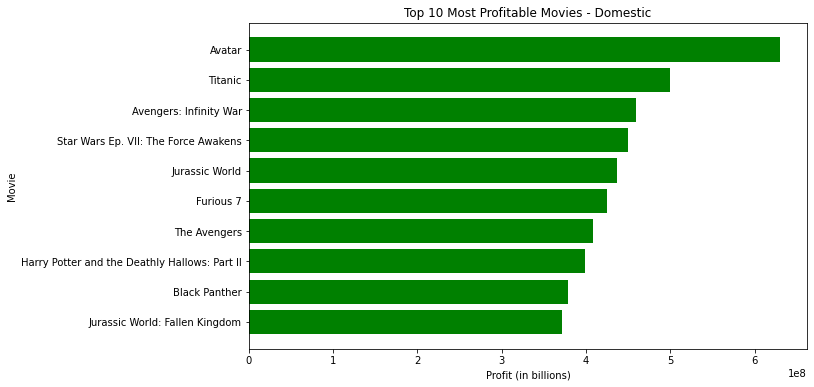

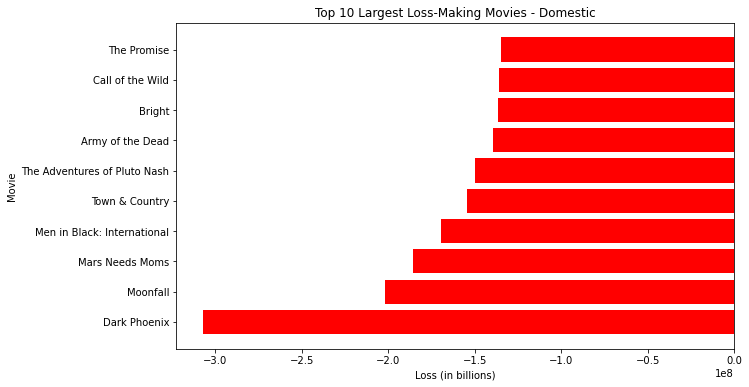

In [31]:
#sort data by most profitable and most loss making
sorted_df2 = tnbudg_df.sort_values(by='domestic_profit', ascending=False)

# Plotting top 10 profitable movies
top10_dprofit = sorted_df2.head(10)
plt.figure(figsize=(10, 6))
plt.barh(top10_profitable['movie'], top10_dprofit['domestic_profit'], color='green')
plt.xlabel('Profit (in billions)')
plt.ylabel('Movie')
plt.title('Top 10 Most Profitable Movies - Domestic')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest profit at the top
plt.show()

# Plotting top 10 loss-making movies
top10_dloss = sorted_df2.tail(10)
plt.figure(figsize=(10, 6))
plt.barh(top10_loss_making['movie'], top10_dloss['domestic_profit'], color='red')
plt.xlabel('Loss (in billions)')
plt.ylabel('Movie')
plt.title('Top 10 Largest Loss-Making Movies - Domestic')
plt.gca().invert_yaxis()  # Invert y-axis to have the largest loss at the top
plt.show()

# b. Competitor Analysis
Number of Movies by the studios from BOM file

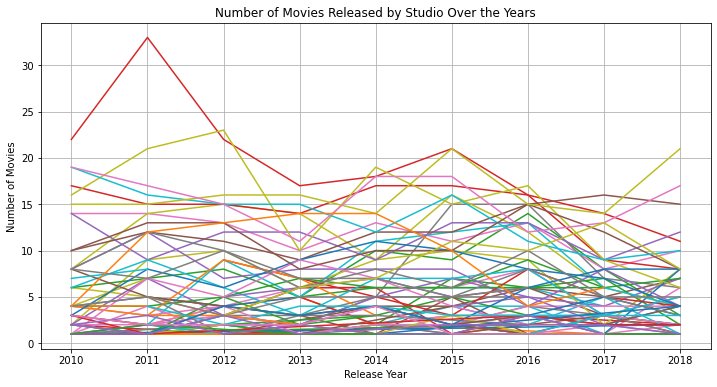

In [6]:
#bom file
bom_df=pd.read_csv('zippedData/bom.movie_gross.csv')

# Group the data by studio and year to count the number of movies
studio_year_count = bom_df.groupby(['studio', 'year']).size().reset_index(name='Count')

# Plotting the graph for each studio
plt.figure(figsize=(12, 6))
for studio in studio_year_count['studio'].unique():
    studio_data = studio_year_count[studio_year_count['studio'] == studio]
    plt.plot(studio_data['year'], studio_data['Count'], label=studio)

plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.title('Number of Movies Released by Studio Over the Years')
plt.grid(True)
plt.show()


Number of movies by studio

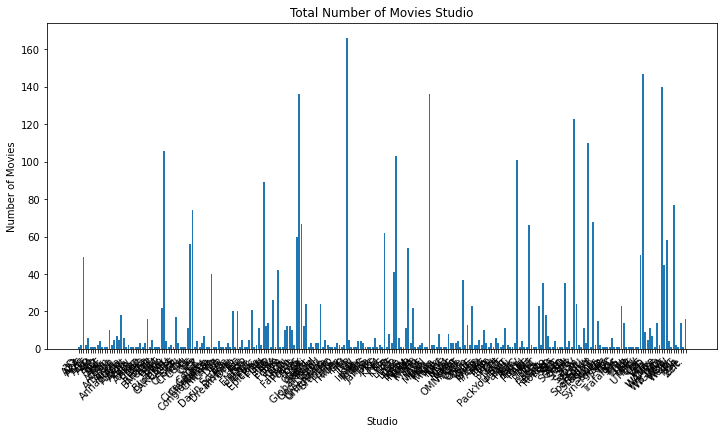

In [8]:
#bom file
bom_df=pd.read_csv('bom.movie_gross.csv')

# Group the data by studio to count the total number of movies for each studio
studio_movie_count = bom_df.groupby('studio').size().reset_index(name='Count')

# Plotting the graph for each studio
plt.figure(figsize=(12, 6))
plt.bar(studio_movie_count['studio'], studio_movie_count['Count'])
plt.xlabel('Studio')
plt.ylabel('Number of Movies')
plt.title('Total Number of Movies Studio')
plt.xticks(rotation=45, ha='right')  # Rotate x-labels for better readability
plt.show()

Top 10 studios with the most movies

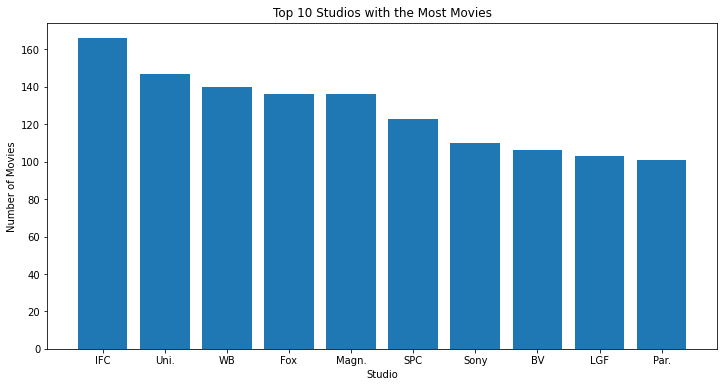

In [9]:
#bom file
bom_df=pd.read_csv('bom.movie_gross.csv')

# Sort the studios based on the number of movies they've produced
studio_movie_count_sorted = studio_movie_count.sort_values(by='Count', ascending=False)

# Get the top 10 studios
top10_studios = studio_movie_count_sorted.head(10)

# Plotting the graph for the top 10 studios
plt.figure(figsize=(12, 6))
plt.bar(top10_studios['studio'], top10_studios['Count'])
plt.xlabel('Studio')
plt.ylabel('Number of Movies')
plt.title('Top 10 Studios with the Most Movies')
plt.show()

What about studios with highest total gross (domestic+foreign)?

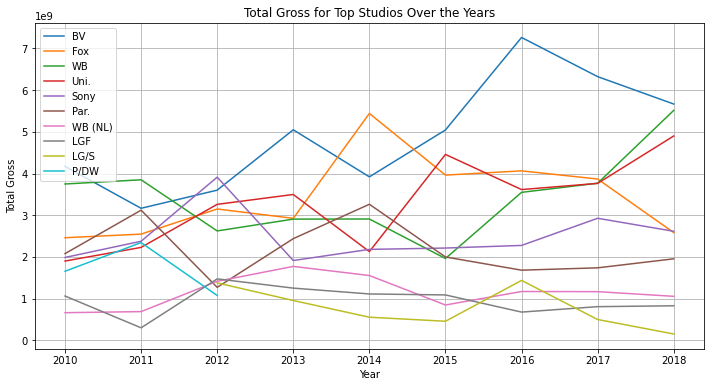

In [63]:
# Convert 'domestic_gross' and 'foreign_gross' columns to numeric, replacing non-numeric or missing values with zeros
bom_df['domestic_gross'] = pd.to_numeric(bom_df['domestic_gross'], errors='coerce').fillna(0)
bom_df['foreign_gross'] = pd.to_numeric(bom_df['foreign_gross'], errors='coerce').fillna(0)

# Group the data by studio and year to calculate the total domestic gross and foreign gross for each studio in each year
grouped_data = bom_df.groupby(['studio', 'year']).agg({'domestic_gross': 'sum', 'foreign_gross': 'sum'}).reset_index()

# Calculate the total gross (domestic + foreign) for each studio in each year
grouped_data['total_gross'] = grouped_data['domestic_gross'] + grouped_data['foreign_gross']

# Find the top studios based on the total gross over all years
top_studios = grouped_data.groupby('studio')['total_gross'].sum().nlargest(10).index 

# Filter the grouped data for the top studios
total_gross_data = grouped_data[grouped_data['studio'].isin(top_studios)].copy()

# Plotting the graph for total gross for each top studio
plt.figure(figsize=(12, 6))
for studio in top_studios:
    studio_data = total_gross_data[total_gross_data['studio'] == studio]
    plt.plot(studio_data['year'], studio_data['total_gross'], label=studio)

plt.xlabel('Year')
plt.ylabel('Total Gross')
plt.title('Total Gross for Top Studios Over the Years')
plt.legend()
plt.grid(True)
plt.show()

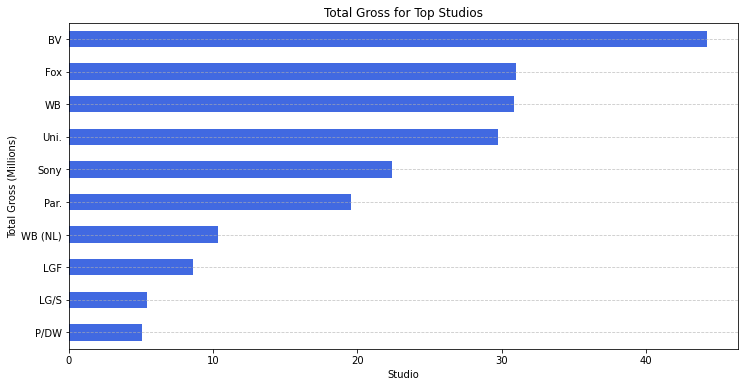

In [75]:
# Calculate the total gross for each top studio
total_gross_by_studio = total_gross_data.groupby('studio')['total_gross'].sum() / 1e9  # Convert to billions

# Sort the total gross by studio in descending order
total_gross_by_studio_profit = total_gross_by_studio.sort_values(ascending=False)

# Plotting the bar chart for total gross for each top studio
plt.figure(figsize=(12, 6))
total_gross_by_studio_profit.plot(kind='barh', color='royalblue')
plt.xlabel('Studio')
plt.ylabel('Total Gross (Millions)')
plt.title('Total Gross for Top Studios')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest profit at the top
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# c. Top genres
This will look at the movie genres that have been created in the past and the number of movies that have been made of the same. 


In [50]:
#read database
imdb_df = pd.read_sql(imdb_query,conn)
imdb_df.head()

# Split the genres column into separate rows
genre_df = imdb_df['genres'].str.split(',', expand=True).stack().reset_index(level=1, drop=True).rename('genre')

# Count the occurrences of each genre
genres = genre_df.value_counts()

# Sort the genres based on their counts to find the top movie genres
genres = genres.sort_values(ascending=False)

print(top_genres)  # Print the genres

Documentary    51640
Drama          49883
Comedy         25312
Thriller       11883
Horror         10805
Action         10335
Romance         9372
Biography       8722
Crime           6753
Adventure       6465
Family          6227
History         6225
Mystery         4659
Music           4314
Fantasy         3516
Sci-Fi          3365
Animation       2799
Sport           2234
News            1551
Musical         1430
War             1405
Western          467
Reality-TV        98
Talk-Show         50
Adult             25
Short             11
Game-Show          4
Name: genre, dtype: int64


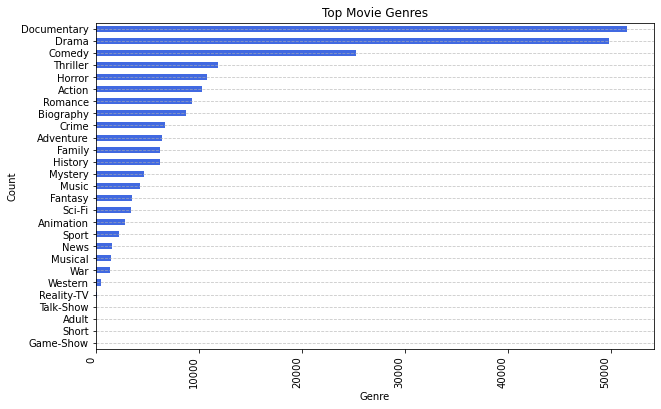

In [67]:
#plot graph of the above data
plt.figure(figsize=(10, 6))
genres.plot(kind='barh', color='royalblue')
plt.title('Top Movie Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=90, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().invert_yaxis()  # Invert y-axis to have the highest genre at the top
plt.show()